In [3]:
# for getting web contents
import requests 
# storing and analysing data
import pandas as pd
# for scraping web contents
from bs4 import BeautifulSoup
# regular expression
import re
# numerical analysis
import numpy as np

# Data Scrapping from Worldometer

In [7]:
# get data
# ========

# link at which web data recides
url = 'https://www.worldometers.info/coronavirus/'
# get web data
req = requests.get(url)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [9]:
print(soup.prettify())

In [15]:
#Get the headers of the last value 

thead = soup.find_all('thead')[-1]
#print(thead)

In [17]:
head =thead.find_all('tr')
#print(head)

In [19]:
# Get the contents of the headers 

tbody =soup.find_all('tbody')[0]
#print(tbody)

In [21]:
body = tbody.find_all('tr')
#print(body)

In [22]:
#Inserting the corresponding rows and columns from head and body content

head_rows =[]
body_rows = []

for tr in head:
    td = tr.find_all(['th','td'])
    row = [i.text for i in td]
    head_rows.append(row)

print(head_rows)

[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl']]


In [23]:
for tr in body:
    td = tr.find_all(['th','td'])
    row = [i.text for i in td]
    body_rows.append(row)
    
print(body_rows)

[['', '\nNorth America\n', '5,714,987', '+5,753', '223,141', '+321', '2,997,162', '+8,102', '2,494,684', '26,069', '', '', '', '', '', 'North America', '\n', '', ''], ['', '\nSouth America\n', '4,287,835', '+1,693', '148,408', '+75', '2,918,355', '+354', '1,221,072', '13,135', '', '', '', '', '', 'South America', '\n', '', ''], ['', '\nAsia\n', '4,540,596', '+17,336', '101,167', '+221', '3,370,317', '+12,558', '1,069,112', '19,129', '', '', '', '', '', 'Asia', '\n', '', ''], ['', '\nEurope\n', '2,931,035', '+7,445', '204,242', '+183', '1,764,051', '+8,847', '962,742', '5,149', '', '', '', '', '', 'Europe', '\n', '', ''], ['', '\nAfrica\n', '972,382', '+95', '20,682', '+11', '633,292', '+363', '318,408', '1,149', '', '', '', '', '', 'Africa', '\n', '', ''], ['', '\nOceania\n', '20,519', '+412', '257', '+11', '12,281', '+5', '7,981', '44', '', '', '', '', '', 'Australia/Oceania', '\n', '', ''], ['', '\n\n', '721', '', '15', '', '651', '', '55', '4', '', '', '', '', '', '', '\n', '', ''],

# Data Preprocessing and Cleaning 

In [105]:
#Converting the request data into a Data frame 
#Creating a data frame and inserting all tje values from body to the corresponding header values

df = pd.DataFrame(body_rows[:len(body_rows)],
columns = head_rows[0])

#Droping the columns with no useful data 
df = df.iloc[8:, :-3].reset_index(drop=True)

# Droping the extra spaces and /n values
df = df.replace('\n','', regex=True)

In [106]:
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent
0,1,USA,"4,862,513",+339,"158,967",+38,"2,448,295","+1,497","2,255,251","18,725","14,682",480,"60,939,722","184,007","331,182,250",North America
1,2,Brazil,"2,751,665",,"94,702",,"1,912,319",,"744,644","8,318","12,937",445,"13,196,132","62,042","212,698,326",South America
2,3,India,"1,858,689","+3,358","39,002",+31,"1,231,682","+1,242","588,005","8,944","1,346",28,"20,864,750","15,106","1,381,233,876",Asia
3,4,Russia,"861,423","+5,159","14,351",+144,"661,471","+7,878","185,601","2,300","5,903",98,"29,201,862","200,094","145,940,412",Europe
4,5,South Africa,"516,862",,"8,539",,"358,037",,"150,286",539,"8,705",144,"3,058,695","51,514","59,375,438",Africa


In [109]:
# Droping the # column

df = df.drop("#", axis = 1)


In [110]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent
0,USA,"4,862,513",+339,"158,967",+38,"2,448,295","+1,497","2,255,251","18,725","14,682",480,"60,939,722","184,007","331,182,250",North America
1,Brazil,"2,751,665",,"94,702",,"1,912,319",,"744,644","8,318","12,937",445,"13,196,132","62,042","212,698,326",South America
2,India,"1,858,689","+3,358","39,002",+31,"1,231,682","+1,242","588,005","8,944","1,346",28,"20,864,750","15,106","1,381,233,876",Asia
3,Russia,"861,423","+5,159","14,351",+144,"661,471","+7,878","185,601","2,300","5,903",98,"29,201,862","200,094","145,940,412",Europe
4,South Africa,"516,862",,"8,539",,"358,037",,"150,286",539,"8,705",144,"3,058,695","51,514","59,375,438",Africa


In [111]:
#Renaming the columns 

df.columns = ['Country/Region', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent']

# rearrange and subselect columns
df = df[['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop' ]]

# first few rows
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,"331,182,250","4,862,513",+339,"158,967",+38,"2,448,295","+1,497","2,255,251","18,725","14,682",480,"60,939,722","184,007"
1,Brazil,South America,"212,698,326","2,751,665",,"94,702",,"1,912,319",,"744,644","8,318","12,937",445,"13,196,132","62,042"
2,India,Asia,"1,381,233,876","1,858,689","+3,358","39,002",+31,"1,231,682","+1,242","588,005","8,944","1,346",28,"20,864,750","15,106"
3,Russia,Europe,"145,940,412","861,423","+5,159","14,351",+144,"661,471","+7,878","185,601","2,300","5,903",98,"29,201,862","200,094"
4,South Africa,Africa,"59,375,438","516,862",,"8,539",,"358,037",,"150,286",539,"8,705",144,"3,058,695","51,514"


In [112]:
#Cleaning the data 

df = df.replace('[,+]','',regex = True)
df = df.replace('N/A','',regex = False)
df = df.replace('',np.nan)

In [113]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,331182250,4862513,339,158967,38,2448295,1497,2255251,18725,14682,480,60939722,184007
1,Brazil,South America,212698326,2751665,NaN,94702,NaN,1912319,NaN,744644,8318,12937,445,13196132,62042
2,India,Asia,1381233876,1858689,3358,39002,31,1231682,1242,588005,8944,1346,28,20864750,15106
3,Russia,Europe,145940412,861423,5159,14351,144,661471,7878,185601,2300,5903,98,29201862,200094
4,South Africa,Africa,59375438,516862,NaN,8539,NaN,358037,NaN,150286,539,8705,144,3058695,51514


In [75]:
df.describe()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,215,213,215,215,40,215,25,210,36,211,124,213,189,195,195
unique,215,6,214,210,33,145,18,203,33,185,74,209,106,195,194
top,Seychelles,Africa,,13,1,,1,22,2,0,1,7,4,1253,6262
freq,1,57,2,3,3,24,4,2,3,14,17,2,11,1,2


In [114]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,331182250,4862513,339,158967,38,2448295,1497,2255251,18725,14682,480,60939722,184007
1,Brazil,South America,212698326,2751665,NaN,94702,NaN,1912319,NaN,744644,8318,12937,445,13196132,62042
2,India,Asia,1381233876,1858689,3358,39002,31,1231682,1242,588005,8944,1346,28,20864750,15106
3,Russia,Europe,145940412,861423,5159,14351,144,661471,7878,185601,2300,5903,98,29201862,200094
4,South Africa,Africa,59375438,516862,NaN,8539,NaN,358037,NaN,150286,539,8705,144,3058695,51514


In [115]:
df.dtypes

Country/Region      object
Continent           object
Population          object
TotalCases          object
NewCases            object
TotalDeaths         object
NewDeaths           object
TotalRecovered      object
NewRecovered        object
ActiveCases         object
Serious,Critical    object
Tot Cases/1M pop    object
Deaths/1M pop       object
TotalTests          object
Tests/1M pop        object
dtype: object

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
Country/Region      215 non-null object
Continent           213 non-null object
Population          215 non-null object
TotalCases          215 non-null object
NewCases            40 non-null object
TotalDeaths         215 non-null object
NewDeaths           25 non-null object
TotalRecovered      210 non-null object
NewRecovered        36 non-null object
ActiveCases         211 non-null object
Serious,Critical    124 non-null object
Tot Cases/1M pop    213 non-null object
Deaths/1M pop       189 non-null object
TotalTests          195 non-null object
Tests/1M pop        195 non-null object
dtypes: object(15)
memory usage: 25.3+ KB


In [293]:
#TypeCasting the data to numeric value for visualization

df['Country/Region'] = pd.to_numeric(df['Country/Region'],errors ='coerce')
df['Population'] = pd.to_numeric(df['Population'],errors ='coerce')
df['TotalCases'] = pd.to_numeric(df['TotalCases'],errors ='coerce')
df['NewCases'] = pd.to_numeric(df['NewCases'],errors ='coerce')
df['TotalDeaths '] = pd.to_numeric(df['TotalDeaths'],errors ='coerce')
df['NewDeaths'] = pd.to_numeric(df['NewDeaths'],errors ='coerce')
df['TotalRecovered'] = pd.to_numeric(df['TotalRecovered'],errors ='coerce')
df['NewRecovered'] = pd.to_numeric(df['NewRecovered'],errors ='coerce')

In [294]:
df.dtypes

Country/Region      float64
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths          object
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases          object
Serious,Critical     object
Tot Cases/1M pop     object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
TotalDeaths         float64
dtype: object

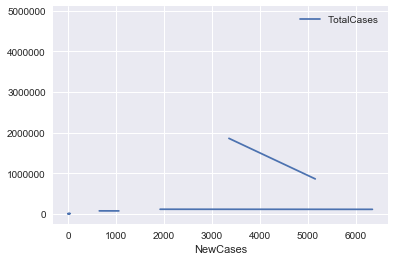

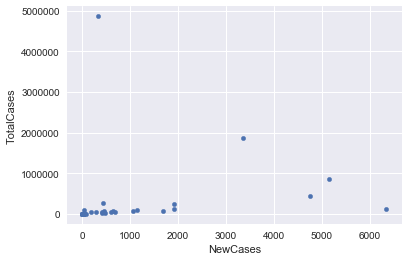

In [222]:
#Simple plot 

x = df.plot(kind ='line', x='NewCases' ,y ='TotalCases')
y = df.plot(kind ='scatter', x='NewCases' ,y ='TotalCases')

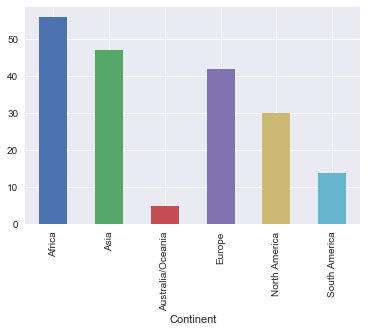

In [206]:
#Analysis with  continent 

df.groupby('Continent')['ActiveCases'].nunique().plot(kind='bar')
plt.show()

In [286]:
# Is for the Country India 
df1

Country/Region            India
Continent                  Asia
Population          1.38123e+09
TotalCases              1858689
NewCases                   3358
TotalDeaths              39002 
NewDeaths                    31
TotalRecovered      1.23168e+06
NewRecovered               1242
ActiveCases              588005
Serious,Critical           8944
Tot Cases/1M pop           1346
Deaths/1M pop                28
TotalTests             20864750
Tests/1M pop              15106
TotalDeaths               39002
Name: 2, dtype: object

In [288]:
df2 = df.loc[df['Continent'] == 'Europe']

In [289]:
df2.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,TotalDeaths
3,NaN,Europe,145940412.0,861423,5159.0,14351,144.0,661471.0,7878.0,185601,2300,5903,98,29201862,200094,14351.0
8,NaN,Europe,46756500.0,344134,NaN,28472,NaN,NaN,NaN,NaN,617,7360,609,6678414,142834,28472.0
11,NaN,Europe,67919112.0,305623,NaN,46210,NaN,NaN,NaN,NaN,86,4500,680,16717684,246141,46210.0
14,NaN,Europe,60453293.0,248229,NaN,35166,NaN,200589.0,NaN,12474,41,4106,582,6940801,114813,35166.0
17,NaN,Europe,83809070.0,212320,NaN,9232,NaN,194700.0,NaN,8388,270,2533,110,8006135,95528,9232.0


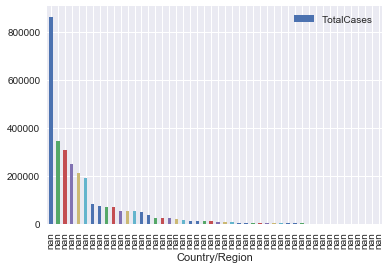

In [292]:
x = df2.plot(kind ='bar', x='Country/Region' ,y ='TotalCases')

In [ ]:
df3